In [254]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression #线性回归  
from sklearn.cross_validation import KFold #交叉验证库，将测试集进行切分交叉验证取平均  
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

In [255]:
data=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')
data = pd.DataFrame(data)
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 数据增强

In [256]:
from sklearn.utils import shuffle#随机打乱数据
data0=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')
data0 = shuffle(data0)
data1=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')
data1 = shuffle(data1)
data2=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')
data2 = shuffle(data2)
data3=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')
data3 = shuffle(data3)
data4=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')
data4 = shuffle(data4)
data=pd.concat([data0,data1,data2,data3,data4]) #拼接数据 

In [257]:
data['Survived'] = data['Survived'].astype('int')
# data_test=pd.read_csv('/home/kesci/input/titanic/test.csv',encoding='gbk')
# data_test = pd.DataFrame(data_test)
# print(data_train.head())
# print(data_test.head())

In [258]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 634 to 497
Data columns (total 12 columns):
PassengerId    4455 non-null int64
Survived       4455 non-null int32
Pclass         4455 non-null int64
Name           4455 non-null object
Sex            4455 non-null object
Age            3570 non-null float64
SibSp          4455 non-null int64
Parch          4455 non-null int64
Ticket         4455 non-null object
Fare           4455 non-null float64
Cabin          1020 non-null object
Embarked       4445 non-null object
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 435.1+ KB


In [260]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,4455.000000,4455.000000,4455.000000,3570.000000,4455.000000,4455.000000,4455.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.238255,0.486374,0.835696,14.518355,1.102248,0.805695,49.671110
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [261]:
data['Pclass'].unique() 

array([3, 1, 2], dtype=int64)

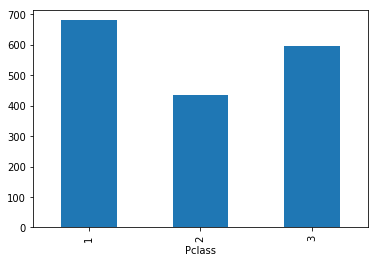

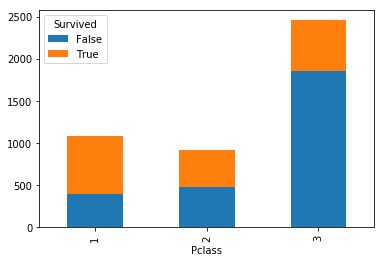

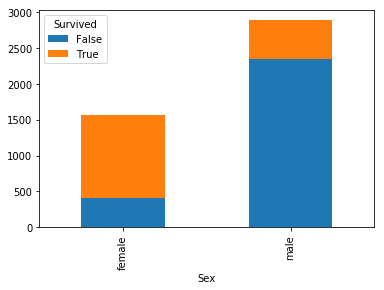

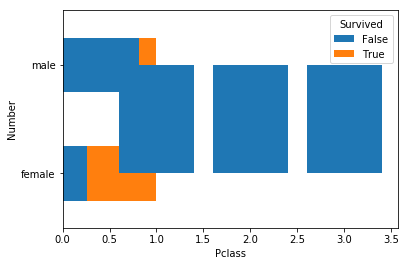

In [262]:
plt.bar(data['Pclass'],data['Survived'])#画出分布直方图
plt.xlabel('Pclass')
plt.ylabel('Number')
plt.show()

In [263]:
plt.figure()
data.groupby('Pclass').Survived.sum().plot(kind='bar')
# data.groupby(['Sex']).Survived.sum().plot(kind='barh')

In [264]:
death_counts = pd.crosstab([data.Pclass], data.Survived.astype(bool))
death_counts.plot(kind='bar', stacked=True,  grid=False)

In [265]:
death_counts = pd.crosstab([data.Sex], data.Survived.astype(bool))
death_counts.plot(kind='bar', stacked=True,  grid=False)

In [266]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

# 开始处理

In [267]:
data['Age'] = data['Age'].fillna(data['Age'].median())#对缺失值用平均值填充 

In [268]:
data.loc[data['Sex'] == 'male','Sex'] = 0 #loc定位到哪一行，将titanic['Sex'] == 'male'的样本Sex值改为0  
data.loc[data['Sex'] == 'female','Sex'] = 1  

In [269]:
data['Embarked'].unique() 

array(['S', 'Q', 'C', nan], dtype=object)

In [270]:
data['Embarked'] = data['Embarked'].fillna('S')     #用最多的填   
data.loc[data['Embarked'] == 'S','Embarked'] = 0    
data.loc[data['Embarked'] == 'C','Embarked'] = 1   
data.loc[data['Embarked'] == 'Q','Embarked'] = 2     
print(data['Embarked'].unique())

[0 2 1]


In [271]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
634,635,0,3,"Skoog, Miss. Mabel",1,9.0,3,2,347088,27.9000,NaN,0
248,249,1,1,"Beckwith, Mr. Richard Leonard",0,37.0,1,1,11751,52.5542,D35,0
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",1,6.0,0,1,248727,33.0000,NaN,0
372,373,0,3,"Beavan, Mr. William Thomas",0,19.0,0,0,323951,8.0500,NaN,0
449,450,1,1,"Peuchen, Major. Arthur Godfrey",0,52.0,0,0,113786,30.5000,C104,0


In [272]:
data=data.drop(['PassengerId','Ticket','Cabin'],axis=1)
print(data.head())
# data= train_df.as_matrix()
print(data.info())

     Survived  Pclass                               Name Sex   Age  SibSp  \
634         0       3                 Skoog, Miss. Mabel   1   9.0      3   
248         1       1      Beckwith, Mr. Richard Leonard   0  37.0      1   
720         1       2  Harper, Miss. Annie Jessie "Nina"   1   6.0      0   
372         0       3         Beavan, Mr. William Thomas   0  19.0      0   
449         1       1     Peuchen, Major. Arthur Godfrey   0  52.0      0   

     Parch     Fare Embarked  
634      2  27.9000        0  
248      1  52.5542        0  
720      1  33.0000        0  
372      0   8.0500        0  
449      0  30.5000        0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 634 to 497
Data columns (total 9 columns):
Survived    4455 non-null int32
Pclass      4455 non-null int64
Name        4455 non-null object
Sex         4455 non-null object
Age         4455 non-null float64
SibSp       4455 non-null int64
Parch       4455 non-null int64
Fare        4455

# 分组Age、Fare

In [273]:
# data['Fare'] = pd.qcut(data['Fare'], 4)
# # data=pd.DataFrame(data)
# data['Fare']=data['Fare'].astype(str)

# data.loc[data['Fare'] == '(-0.001, 7.91]','Fare'] = 0
# data.loc[data['Fare'] == '(7.91, 14.454]','Fare'] = 1
# data.loc[data['Fare'] == '(14.454, 31.0]','Fare'] = 2
# data.loc[data['Fare'] == '(31.0, 512.329]','Fare'] = 3

# data['Age'] = pd.cut(data['Age'], 5)

# data['Age']=data['Age'].astype(str)

# data.loc[data['Age'] == '(0.34, 16.336]','Age'] = 0
# data.loc[data['Age'] == '(16.336, 32.252]','Age'] = 1
# data.loc[data['Age'] == '(32.252, 48.168]','Age'] = 2
# data.loc[data['Age'] == '(48.168, 64.084]','Age'] = 3
# data.loc[data['Age'] == '(64.084, 80.0]','Age'] = 4

# 处理Name

In [274]:
import re as re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #如果称呼存在，返回称呼
    if title_search:
        return title_search.group(1)
    return 


data0=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')


data['Name'] = data0['Name'].apply(get_title)
print(pd.crosstab(data['Name'], data['Sex']))
data['Name'] = data['Name'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Name'] = data['Name'].replace('Mlle', 'Miss')
data['Name'] = data['Name'].replace('Ms', 'Miss')
data['Name'] = data['Name'].replace('Mme', 'Mrs')


data.loc[data['Name'] == 'Master','Name'] = 0
data.loc[data['Name'] == 'Miss','Name'] = 1
data.loc[data['Name'] == 'Mr','Name'] = 2
data.loc[data['Name'] == 'Mrs','Name'] = 3
data.loc[data['Name'] == 'Capt','Name'] = 4
data.loc[data['Name'] == 'Col','Name'] = 4
data.loc[data['Name'] == 'Countess','Name'] = 4
data.loc[data['Name'] == 'Don','Name'] = 4
data.loc[data['Name'] == 'Dr','Name'] = 4
data.loc[data['Name'] == 'Jonkheer','Name'] = 4
data.loc[data['Name'] == 'Lady','Name'] = 1
data.loc[data['Name'] == 'Mlle','Name'] = 1
data.loc[data['Name'] == 'Mme','Name'] = 1
data.loc[data['Name'] == 'Ms','Name'] = 1
data.loc[data['Name'] == 'Rev','Name'] = 4
data.loc[data['Name'] == 'Sir','Name'] = 4
data.loc[data['Name'] == 'Rare','Name'] = 4

Sex          0    1
Name               
Capt         5    0
Col         10    0
Countess     0    5
Don          5    0
Dr          30    5
Jonkheer     5    0
Lady         0    5
Major       10    0
Master     200    0
Miss         0  910
Mlle         0   10
Mme          0    5
Mr        2585    0
Mrs          0  625
Ms           0    5
Rev         30    0
Sir          5    0


In [275]:
data.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
634,0,3,1,1,9.0,3,2,27.9000,0
248,1,1,2,0,37.0,1,1,52.5542,0
720,1,2,1,1,6.0,0,1,33.0000,0
372,0,3,2,0,19.0,0,0,8.0500,0
449,1,1,4,0,52.0,0,0,30.5000,0
169,0,3,2,0,28.0,0,0,56.4958,0
145,0,2,2,0,19.0,1,1,36.7500,0
575,0,3,2,0,19.0,0,0,14.5000,0
521,0,3,2,0,22.0,0,0,7.8958,0
582,0,2,2,0,54.0,0,0,26.0000,0


In [276]:
y, x = np.split(data, (1,), axis=1)
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 7)
x_train=x_train.astype(int)
x_test=x_test.astype(int)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
x_test.dtypes

Pclass      int32
Name        int32
Sex         int32
Age         int32
SibSp       int32
Parch       int32
Fare        int32
Embarked    int32
dtype: object

# 决策树

In [277]:
# from sklearn import tree
# model_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
# model_tree.fit(x_train,y_train)
# print("准确率为：{:.2f}".format(model_tree.score(x_train, y_train)))
# print("准确率为：{:.2f}".format(model_tree.score(x_test,y_test)))

# SVM

In [278]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'kernel': ['rbf', 'linear'],
#     'C': [0.001, 1],
#     'gamma': [0.0001, 0.0005]
# }
# model_SVC = GridSearchCV(SVC(), param_grid=parameters, cv=3)
# model_SVC.fit(x_train, y_train)
# # print ("最优参数列表:", model_SVC.best_params_)
# # print ("最优模型:", model_SVC.best_estimator_)
# # print ("最优准确率:", model_SVC.best_score_)
# print("准确率为：{:.2f}".format(model_SVC.score(x_train,y_train)))
# print("准确率为：{:.2f}".format(model_SVC.score(x_test,y_test)))

# RandomForest

In [297]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForestClassifier = RandomForestClassifier(max_depth=9,n_estimators=1000, random_state=3)
model_RandomForestClassifier.fit(x_train, y_train)
print("准确率为：{:.2f}".format(model_RandomForestClassifier.score(x_train,y_train)))
print("准确率为：{:.2f}".format(model_RandomForestClassifier.score(x_test,y_test)))

D:\program\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


准确率为：0.92
准确率为：0.94


# AdaBoostClassifier

In [280]:
# from sklearn.ensemble import AdaBoostClassifier
# model_AdaBoostClassifier = AdaBoostClassifier(learning_rate = 1,n_estimators=1000,random_state=7)
# model_AdaBoostClassifier.fit(x_train, y_train)
# print("准确率为：{:.2f}".format(model_AdaBoostClassifier.score(x_train,y_train)))
# print("准确率为：{:.2f}".format(model_AdaBoostClassifier.score(x_test,y_test)))

# GBDT

In [281]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoostingClassifier = GradientBoostingClassifier(
    loss='deviance', 
    learning_rate=0.8, 
    n_estimators=1000, 
    criterion='friedman_mse', 
    max_depth=3, 
    random_state=7)
# model_GradientBoostingClassifier.fit(x_train, y_train)  ##多类别回归建议使用随机森林
# print("准确率为：{:.2f}".format(model_GradientBoostingClassifier.score(x_train,y_train)))
# print("准确率为：{:.2f}".format(model_GradientBoostingClassifier.score(x_test,y_test)))

# Lightbgm

In [282]:
# import lightgbm as lgb
# model_lightgbm = lgb.LGBMClassifier(n_estimators=70,max_depth=6,num_leaves=64,colsample_bytree=0.3)
# model_lightgbm.fit(x_train,y_train)
# print("准确率为：{:.2f}".format(model_lightgbm.score(x_train, y_train)))
# print("准确率为：{:.2f}".format(model_lightgbm.score(x_test,y_test)))

# xgboost

In [283]:
# import xgboost as xgb
# model_xgboost = xgb.XGBClassifier(n_estimators=70,max_depth=6,colsample_bytree=0.3)
# model_xgboost.fit(x_train,y_train)
# print("准确率为：{:.2f}".format(model_xgboost.score(x_train, y_train)))
# print("准确率为：{:.2f}".format(model_xgboost.score(x_test,y_test)))

# 预测

In [284]:
data_test=pd.read_csv('D:/ML/tainchi_data/Titanic/test.csv',encoding='gbk')
data_test = pd.DataFrame(data_test)

PassengerId=data_test[['PassengerId']] 


In [285]:
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].median())#对缺失值用平均值填充 
data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].median())#对缺失值用众数填充 

In [286]:
data_test.loc[data_test['Sex'] == 'male','Sex'] = 0 #loc定位到哪一行，将titanic['Sex'] == 'male'的样本Sex值改为0  
data_test.loc[data_test['Sex'] == 'female','Sex'] = 1 

In [287]:
data_test['Embarked'] = data_test['Embarked'].fillna('S')     #用最多的填   
data_test.loc[data_test['Embarked'] == 'S','Embarked'] = 0    
data_test.loc[data_test['Embarked'] == 'C','Embarked'] = 1   
data_test.loc[data_test['Embarked'] == 'Q','Embarked'] = 2  

In [288]:
import re as re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #如果称呼存在，返回称呼
    if title_search:
        return title_search.group(1)
    return 


data0=pd.read_csv('D:/ML/tainchi_data/Titanic/train.csv',encoding='gbk')


data_test['Name'] = data0['Name'].apply(get_title)
# print(pd.crosstab(data_test['Name'], data['Sex']))
data_test['Name'] = data_test['Name'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_test['Name'] = data_test['Name'].replace('Mlle', 'Miss')
data_test['Name'] = data_test['Name'].replace('Ms', 'Miss')
data_test['Name'] = data_test['Name'].replace('Mme', 'Mrs')


data_test.loc[data_test['Name'] == 'Master','Name'] = 0
data_test.loc[data_test['Name'] == 'Miss','Name'] = 1
data_test.loc[data_test['Name'] == 'Mr','Name'] = 2
data_test.loc[data_test['Name'] == 'Mrs','Name'] = 3
data_test.loc[data_test['Name'] == 'Capt','Name'] = 4
data_test.loc[data_test['Name'] == 'Col','Name'] = 4
data_test.loc[data_test['Name'] == 'Countess','Name'] = 4
data_test.loc[data_test['Name'] == 'Don','Name'] = 4
data_test.loc[data_test['Name'] == 'Dr','Name'] = 4
data_test.loc[data_test['Name'] == 'Jonkheer','Name'] = 4
data_test.loc[data_test['Name'] == 'Lady','Name'] = 1
data_test.loc[data_test['Name'] == 'Mlle','Name'] = 1
data_test.loc[data_test['Name'] == 'Mme','Name'] = 1
data_test.loc[data_test['Name'] == 'Ms','Name'] = 1
data_test.loc[data_test['Name'] == 'Rev','Name'] = 4
data_test.loc[data_test['Name'] == 'Sir','Name'] = 4
data_test.loc[data_test['Name'] == 'Rare','Name'] = 4

In [289]:
data_test=data_test.drop(['PassengerId','Ticket','Cabin'],axis=1)
# data_test=data_test.astype(int)
data_test.info()

# data_test.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [290]:
data_test.head(50)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,0,34.5,0,0,7.8292,2
1,3,3,1,47.0,1,0,7.0000,0
2,2,1,0,62.0,0,0,9.6875,2
3,3,3,0,27.0,0,0,8.6625,0
4,3,2,1,22.0,1,1,12.2875,0
5,3,2,0,14.0,0,0,9.2250,0
6,3,2,1,30.0,0,0,7.6292,2
7,2,0,0,26.0,1,1,29.0000,0
8,3,3,1,18.0,0,0,7.2292,1
9,3,3,0,21.0,2,0,24.1500,0


In [291]:
# predictions_GBDT=model_GradientBoostingClassifier.predict(data_test)
# result = pd.DataFrame({'PassengerId':PassengerId['PassengerId'].as_matrix(), 'Survived':predictions_GBDT.astype(np.int32)})
# # data_test.iloc[150:200,:]
# # result=pd.DataFrame(result)
# result.to_csv("D:/ML/tainchi_data/Titanic/GBDT_predictions_2.csv", index=False)

In [298]:
predictions_RandomForest=model_RandomForestClassifier.predict(data_test)
result = pd.DataFrame({'PassengerId':PassengerId['PassengerId'].as_matrix(), 'Survived':predictions_RandomForest.astype(np.int32)})
result.to_csv("D:/ML/tainchi_data/Titanic/RandomForest_predictions_5.csv", index=False)

#  VotingClassifier 

In [ ]:
# from  sklearn.ensemble  import VotingClassifier 

In [ ]:
# eclf = VotingClassifier(estimators=[('RF', model_RandomForestClassifier), ('GBDT', model_GradientBoostingClassifier),('lightgbm', model_lightgbm), ('xgboost', model_xgboost)], voting='hard',weights=[7,1,1,1])

In [ ]:
# eclf.fit(x_train, y_train)
# print("准确率为：{:.2f}".format(eclf.score(x_train,y_train)))
# print("准确率为：{:.2f}".format(eclf.score(x_test,y_test)))

In [ ]:
# predictions_eclf=eclf.predict(data_test)
# result = pd.DataFrame({'PassengerId':PassengerId['PassengerId'].as_matrix(), 'Survived':predictions_eclf.astype(np.int32)})

In [ ]:
# result.to_csv("D:/ML/tainchi_data/Titanic/eclf_predictions.csv", index=False)